In [1]:
#Read interaction csv file
#FO1_2
import pandas as pd

# File path
file_path = "/rugpfs/fs0/cao_lab/scratch/aabdul/projects/AA_20231221_BeadArraySeq_42/Intermediate_data_connections/Spatial_barcode_rmdup/20231221_FO3_5_connection.spatial.csv.gz"

# Read the file
df = pd.read_csv(file_path, compression='gzip')

# Display the first few rows of the dataframe
print(Filter.head())


    GTGGTCTACAATATCCGGGACTTGAGGACCTCTA  AGTGCGCA  \
0    TCTAAGCTCTTAACGCGCTGGTTCAGTCACTAG  CCAGGAGA   
1    TCCATACTGAGAGTTCGAGCTTACCTCGTGCAA  AGGGCTTA   
2    TTGAGGATGCAGTAAGGTACGGTCTGTCCGTTA  GTAAGTTA   
3  AGTTCCGTAGTCGCCTTAAAGGTCCTAGACTCGAT  TTAGGGTC   
4    TAACACGACAACAACCGCTGGTTCATGGTCCAA  AGTGGTTA   

    GTAGCATGGAACCTAGCACCATACTGGCTAGAGTTGCA  
0   GTCCAACGATAACCTCTCGGTCTACAGCTACTCTAACG  
1  AGTTGTGTGCTACGCTTGTGTCAGAACGCTAACCCTGCA  
2    TGACCATACCAACCTAGGTACACCAGCTAACTGGTGA  
3    TGTTCCAAGGGATTGTCATTGGCTGGCTATCGCATAG  
4   GTCTTCTCGAACAGCACTATGTTGGCGCTACCTAAGTC  


In [2]:
df.columns = ["Bead1_seq", "UMI", "Bead2_seq"]

# Verify the column names have been changed
print(Filter.columns)


Index(['Bead1_seq', 'UMI', 'Bead2_seq'], dtype='object')


In [3]:
#create interaction df
import pandas as pd

def bead1_bead2_interaction(input_df):
    # Rename columns
    inside_df = input_df.copy()
    inside_df.columns = ["Bead1_seq", "UMI", "Bead2_seq"]

    # Group by Bead1_seq and Bead2_seq, then count unique UMI values
    n_umi_per_interaction_table = inside_df.groupby(['Bead1_seq', 'Bead2_seq']).size().reset_index(name='n_umi')

    # Group by Bead1_seq and count unique UMI values
    n_umi_per_bead1_table = n_umi_per_interaction_table.groupby('Bead1_seq').size().reset_index(name='n_umi')

    return {'n_umi_per_interaction': n_umi_per_interaction_table,
            'n_umi_per_bead1': n_umi_per_bead1_table}



In [4]:
output_list_patterns_Filter = bead1_bead2_interaction(df)


In [5]:
import numpy as np

# Assuming output_list_patterns_Filter is a dictionary and n_umi_per_interaction is a key pointing to a DataFrame
output_list_patterns_Filter['n_umi_per_interaction']['log_transformed'] = np.log10(output_list_patterns_Filter['n_umi_per_interaction']['n_umi'])


In [6]:
# Filter low quality interactions
filtered_df_filter = output_list_patterns_Filter['n_umi_per_interaction'][output_list_patterns_Filter['n_umi_per_interaction']['log_transformed'] >= .9]


In [7]:
#get range of interaction counts
n_umi_range = filtered_df_filter['n_umi'].agg(['min', 'max'])

print("Range of n_umi column:")
print(f"Min: {n_umi_range['min']}")

print(f"Max: {n_umi_range['max']}")


Range of n_umi column:
Min: 8
Max: 26110


In [8]:
#create interaction matrix
import pandas as pd
import numpy as np

# Extract unique values
unique_bead1_seq = filtered_df_filter['Bead1_seq'].unique()
unique_bead2_seq = filtered_df_filter['Bead2_seq'].unique()


# Get the number of unique values
num_bead1_seq = len(unique_bead1_seq)
num_bead2_seq = len(unique_bead2_seq)

# Create a DataFrame initialized with zeros
matrix_data_filter = pd.DataFrame(0, index=unique_bead1_seq, columns=unique_bead2_seq)

# Fill the DataFrame with counts from the original DataFrame
for _, row in filtered_df_filter.iterrows():
    matrix_data_filter.at[row['Bead1_seq'], row['Bead2_seq']] = row['n_umi']


In [9]:
#save int
matrix_data_filter.to_csv('/lustre/fs4/cao_lab/store/aabdul/restored/projects/AA_20231221_BeadArraySeq_42/GEO/Matrices_connections/FO3_5matrix_data_filter.csv')


In [10]:
np.savetxt('/rugpfs/fs0/cao_lab/scratch/aabdul/projects/AA_20231221_BeadArraySeq_42/Intermediate_data_connections/UMAP/FO3_5_connection_matrix.txt', matrix_data_filter)


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
matrix_data_filter

,AGTACTTCGGTAACACGACCCAACGATGCTATACAGGTC,AGTGGCTCAATAAGACTGGAACAACCGGCTATCGTGCAA,AGTGGCTCAATCTAAGCTCAGCTTACCGCTAAGTACCGT,AGTGGTACCGCCTTAATACGGTCTGCTAGCTCTGAT,AGTTCATGCGTGACCATACGGCAATCTGCTAATCAGACC,AGTTCATGCGTTGAGGATGAACAACCGGCTACGTACTGA,AGTTCGCATTCCCATACTGCAGAACACGCTACTAGTACG,AGTTCGCATTCGCGTTATGACACCGTAGCTACTCTAACG,CGTGCATAAGGTAGAGTTCTGAGGGCTATACCGCTA,CGTGCATAAGTGGTACGCTATTCGGCTAGAGTACGT,...,GTAGCATGGACTGGTTCACTAAGCTCGCTATGACGAGT,AGTCTCACAGTTGAGGATGTCATGCGTGCTATCTAACGC,ACCTGTTGCAAGACCTGCAAGCAAGCTAGTCACTGA,GTCTTCTCGAAACCAGGTGTTCCAAGGCTATACCGCTA,ACACTCAGTTGTTCCGGGACGTATGCTATGCGAGTA,AGTAACCTCTCCCATACTGACTTCGGTGCTAAGCTTACG,TAACAACCGAGTGGTACAAGAGGCAGCTAATCGTGAC,ACCTGTTGTCATGCGTGATCGGTAGCTAGAGTACGT,AGTGTGTAACCCTCGTGATCCGATGTAGCTATACCGCTA,ACCTAGCAAGTGGTACGAGAGAGTGCTAAGCGTTAC
ACACCGTAAACAACCGATTGGCTGGATCAGCA,42,9,35,12,8,10,11,13,8,53,...,0,0,0,0,0,0,0,0,0,0
ACACCGTAAACAACCGCGGAATTGGACTCGAT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ACACCGTAAACACGACAAGGATCCCTAGTACG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ACACCGTAAACACGACAAGGATCCCTAGTCGA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ACACCGTAAACACGACAAGGATCCGAGTACGT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCCGCTTTTCCGCTTCAGTAAGGTACACGAC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
TTTCCGCTTTTCCGCTTGTCAGAACTACGTCGT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTCCGCTTTTCTGAGGATATCCGGAGGCTGAT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTCCGCTTTTGTTCCGACCTGTTGGCTGACAT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


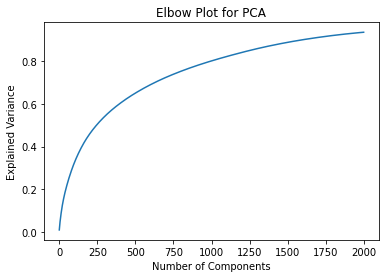

In [11]:

# Log1p transformation
matrix_data_log1p = np.log1p(matrix_data_filter)

# Standardize the data (optional but often recommended)
scaler = StandardScaler()
matrix_data_standardized = scaler.fit_transform(matrix_data_log1p)

# Perform PCA on the standardized and log-transformed data
pca = PCA(n_components=2000)
pca.fit(matrix_data_standardized)

# Plot the explained variance as a function of the number of components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Elbow Plot for PCA')
plt.show()


In [16]:
# Perform PCA on the standardized and log-transformed data

# Log1p transformation
matrix_data_log1p = np.log1p(matrix_data_filter)

# Standardize the data (optional but often recommended)
scaler = StandardScaler()
matrix_data_standardized = scaler.fit_transform(matrix_data_log1p)

pca = PCA(n_components=600)
matrix_data_pca = pca.fit_transform(matrix_data_standardized)


In [ ]:
import numpy as np
import umap
from sklearn.preprocessing import normalize

# Set random seed for reproducibility
SEED = 42  # Set this to your desired seed value


# Create and fit the UMAP transformer
mapper = umap.UMAP(
    n_neighbors=19,
    min_dist=0.23
    ,
    metric='euclidean',
    random_state=SEED,
    n_epochs=500,
    verbose=True, spread=.5
)
coords = mapper.fit_transform(matrix_data_pca)


UMAP(min_dist=0.23, n_epochs=500, n_neighbors=19, random_state=42, spread=0.5, verbose=True)
Sat Dec 30 19:25:53 2023 Construct fuzzy simplicial set
Sat Dec 30 19:25:53 2023 Finding Nearest Neighbors
Sat Dec 30 19:25:53 2023 Building RP forest with 11 trees
Sat Dec 30 19:25:54 2023 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Sat Dec 30 19:25:55 2023 Finished Nearest Neighbor Search
Sat Dec 30 19:25:55 2023 Construct embedding


Epochs completed:  31%| ███        155/500 [00:09]

In [16]:
umap_df = pd.DataFrame(coords, columns=['UMAP1','UMAP2'], index=matrix_data_filter.index)


/tmp/ipykernel_195639/3644054876.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], s=s, cmap='Spectral')


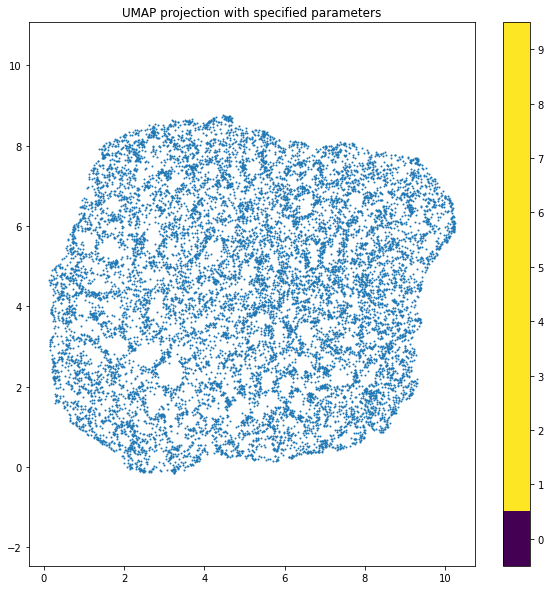

In [17]:
import matplotlib.pyplot as plt

def plot_umap(embedding, title='UMAP Embedding', s=1, figsize=(10, 10)):
    """
    Plots UMAP embeddings.
    
    Parameters:
    - embedding: UMAP embeddings (typically from mapper.fit_transform)
    - title: Title of the plot
    - s: Size of each point
    - figsize: Size of the figure
    """
    plt.figure(figsize=figsize)
    plt.scatter(embedding[:, 0], embedding[:, 1], s=s, cmap='Spectral')
    plt.gca().set_aspect('equal', 'datalim')
    plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
    plt.title(title)
    plt.show()

# To plot your coords
plot_umap(coords, title="UMAP projection with specified parameters")


In [18]:
#FO1_2
# Specify your desired file path and name
file_path = "/rugpfs/fs0/cao_lab/scratch/aabdul/projects/AA_20231221_BeadArraySeq_42/Intermediate_data_connections/UMAP/FO3_5_connection.csv"

# Save the DataFrame to a CSV file
umap_df.to_csv(file_path)

# Optionally print a message to indicate the process is done
print(f"Data saved to {file_path}")


Data saved to /rugpfs/fs0/cao_lab/scratch/aabdul/projects/AA_20231221_BeadArraySeq_42/Intermediate_data_connections/UMAP/FO3_5_connection.csv
